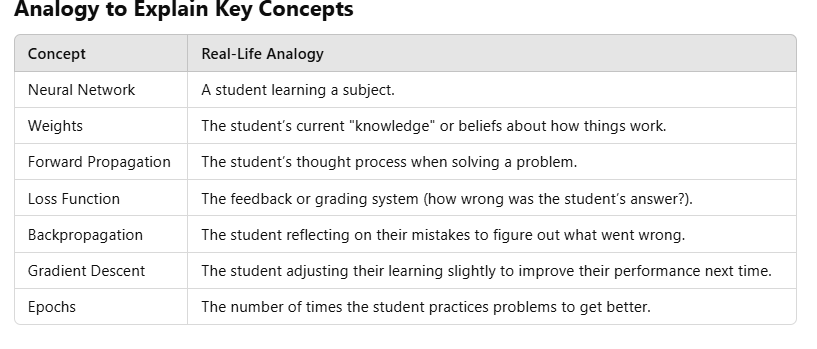

In [1]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.26100-SP0
Tensor Flow Version: 2.3.0

Python 3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:38:07) [MSC v.1929 64 bit (AMD64)]
Pandas 2.0.3
Scikit-Learn 1.3.0
SciPy 1.10.1
GPU is NOT AVAILABLE


Simple Neural Network in Python using TensorFlow

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

Steps before Creating a Neural Network (Preprocess the Data)

In [3]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
X_train.shape[1]
# X_train.shape[1] gives the number of features in the training data.
# It's important for defining the input size of the first layer in a neural network model, ensuring the model knows how many input features each data point has.

18

In [5]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [6]:
%%time
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6028
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6046
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6046
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6046
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 11/100
18/18 [===================

Let's see all the steps in action within one snippet of code

In [7]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5975
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.6046
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6046
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6046
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6046
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6046
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6046
Epoch 11/100
18/18 [==================